In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
- масштабирование признаков (не менее чем тремя способами);
- обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);
- обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
- отбор признаков:
  - один метод из группы методов фильтрации (filter methods);
  - один метод из группы методов обертывания (wrapper methods);
  - один метод из группы методов вложений (embedded methods).

In [2]:
data = pd.read_csv('/Users/a.fedorova/Desktop/учеба/Великолепная мага/2 сем/датасеты/top2018.csv', sep=",")

In [3]:
data.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


In [4]:
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
mean,0.71646,0.659060,5.330000,-5.677640,0.590000,0.115569,0.195701,0.001584,0.158302,0.484443,119.904180,205206.780000,3.98
std,0.13107,0.145067,3.676447,1.777577,0.494311,0.104527,0.220946,0.013449,0.111662,0.206145,28.795984,40007.893404,0.20
min,0.25800,0.296000,0.000000,-10.109000,0.000000,0.023200,0.000282,0.000000,0.021500,0.079600,64.934000,95467.000000,3.00
25%,0.63550,0.562000,1.750000,-6.650500,0.000000,0.045350,0.040225,0.000000,0.094675,0.341000,95.730750,184680.000000,4.00
50%,0.73300,0.678000,5.000000,-5.566500,1.000000,0.074950,0.109000,0.000000,0.118500,0.470500,120.116000,205047.500000,4.00
75%,0.79825,0.772250,8.250000,-4.363750,1.000000,0.137000,0.247750,0.000031,0.170750,0.641500,140.022750,221493.250000,4.00
max,0.96400,0.909000,11.000000,-2.384000,1.000000,0.530000,0.934000,0.134000,0.636000,0.931000,198.075000,417920.000000,5.00


In [5]:
X_ALL = data.drop(['id', 'name', 'artists', 'liveness'], axis=1)

In [6]:
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

# Масштабирование признаков 

### StandardScaler

In [7]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms,time_signature
0,0.287854,-1.455314,0.456531,-1.997753,0.833616,-0.063162,-0.739184,-0.112147,-0.621334,-1.491544,-0.156599,0.100504
1,0.180503,-0.319108,0.729903,0.450984,0.833616,0.282982,0.283383,0.159656,-0.055789,-1.566444,-0.969690,0.100504
2,-0.992691,-0.859498,-0.090213,-0.233147,-1.199593,-0.247772,-0.357995,-0.113440,-1.679294,1.394085,0.325071,0.100504
3,0.172835,-0.693224,0.729903,-1.319276,0.833616,0.013759,1.748092,-0.118343,-0.221552,0.705712,0.407795,0.100504
4,0.908957,-0.229043,-1.183701,-0.087840,0.833616,0.090680,-0.622280,-0.113859,-0.655462,-1.007767,0.319494,0.100504
...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.248901,-0.277539,1.276647,-0.750486,0.833616,-0.740065,-0.564510,-0.118343,-0.977238,0.179460,0.307311,0.100504
96,-0.601626,-0.007344,-0.636957,-0.362058,0.833616,-0.672759,0.224249,-0.118061,-0.752970,-0.517533,0.013596,0.100504
97,-1.261069,0.699321,-1.457073,0.549363,0.833616,2.177157,-0.556777,-0.118343,0.753525,0.551376,1.376460,5.125693
98,-3.515443,-1.538451,1.550019,-0.517542,-1.199593,-0.736219,-0.430776,-0.118248,-1.890398,2.098966,0.848919,0.100504


In [8]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

/Users/a.fedorova/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


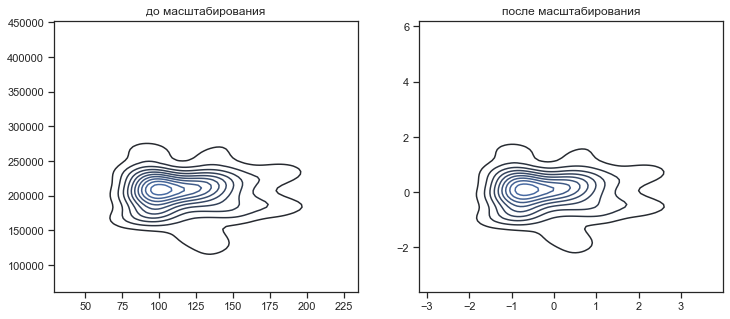

In [9]:
draw_kde(['tempo', 'duration_ms'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

### Масштабирование "Mean Normalisation"

In [10]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['liveness'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((80, 12), (20, 12))

In [11]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [12]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms,time_signature
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,-0.016824,-0.006161,-0.030227,-0.002058,0.002500,-0.007142,0.008788,-0.002752,-0.015016,0.002877,0.001320,-0.00375
std,0.185652,0.241376,0.334222,0.231335,0.494311,0.206249,0.250518,0.100364,0.247088,0.216282,0.124074,0.10000
min,-0.666200,-0.610254,-0.514773,-0.578758,-0.587500,-0.189402,-0.212786,-0.014570,-0.500265,-0.409995,-0.339008,-0.49375
25%,-0.131498,-0.167658,-0.355682,-0.128667,-0.587500,-0.145696,-0.167497,-0.014570,-0.186949,-0.178686,-0.062338,0.00625
50%,0.006604,0.025354,-0.060227,0.012406,0.412500,-0.087290,-0.089517,-0.014570,-0.031729,0.004468,0.000826,0.00625
75%,0.099026,0.182176,0.235227,0.168932,0.412500,0.035145,0.067803,-0.014340,0.173234,0.153984,0.051828,0.00625
max,0.333800,0.409713,0.485227,0.426578,0.412500,0.810598,0.845900,0.985430,0.520231,0.590005,0.660992,0.50625


In [13]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

In [14]:
data_cs22_scaled_train.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms,time_signature
count,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01
mean,-1.161181e-16,-2.223915e-16,1.457168e-17,-7.736867e-17,1.942890e-17,4.128642e-17,2.706169e-17,7.676151e-18,9.992007e-17,2.702699e-16,3.777360e-17,8.881784e-17
std,1.742082e-01,2.318961e-01,3.348639e-01,2.281019e-01,4.953901e-01,2.164278e-01,2.333134e-01,1.121774e-01,2.385555e-01,2.082451e-01,1.338372e-01,9.723227e-02
min,-6.662004e-01,-5.902870e-01,-5.147727e-01,-5.734220e-01,-5.875000e-01,-1.894016e-01,-2.119261e-01,-1.457002e-02,-4.797690e-01,-4.099950e-01,-3.390081e-01,-4.937500e-01
25%,-1.106055e-01,-1.622504e-01,-3.329545e-01,-1.217367e-01,-5.875000e-01,-1.440188e-01,-1.662211e-01,-1.457002e-02,-1.725653e-01,-1.785224e-01,-6.957657e-02,6.250000e-03
50%,1.226983e-02,2.202579e-02,3.068182e-02,-4.187272e-03,4.125000e-01,-7.860843e-02,-9.972150e-02,-1.457002e-02,-2.094121e-02,1.843422e-02,8.259343e-04,6.250000e-03
75%,1.007967e-01,1.701123e-01,3.034091e-01,1.692575e-01,4.125000e-01,2.823846e-02,6.780310e-02,-1.440976e-02,1.732335e-01,1.366679e-01,4.866391e-02,6.250000e-03
max,3.337996e-01,4.097130e-01,4.852273e-01,4.265780e-01,4.125000e-01,8.105984e-01,7.880739e-01,9.854300e-01,5.202310e-01,5.900050e-01,6.609919e-01,5.062500e-01


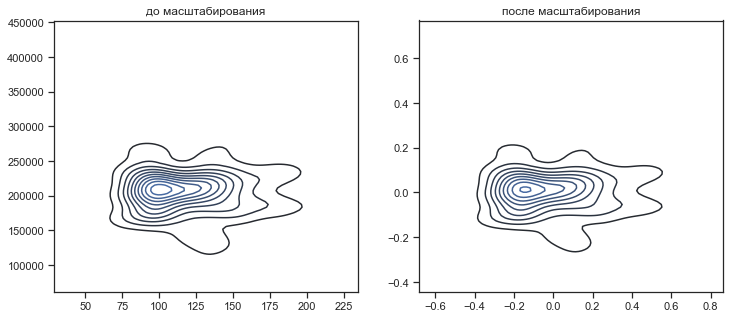

In [15]:
draw_kde(['tempo', 'duration_ms'], data, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

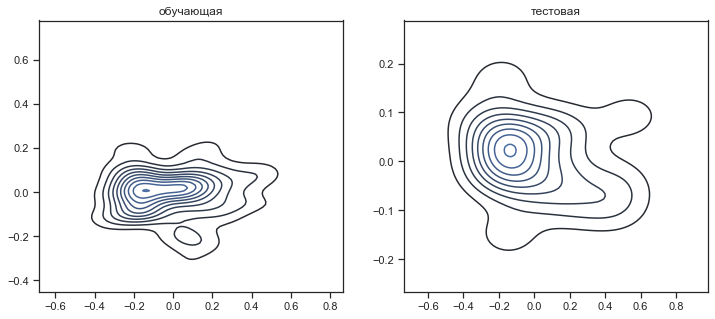

In [16]:
draw_kde(['tempo', 'duration_ms'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

### MinMax-масштабирование

In [17]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms,time_signature
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
mean,0.649377,0.592268,0.484545,0.573639,0.590000,0.182259,0.209292,0.011818,0.475503,0.412872,0.340328,0.49
std,0.185652,0.236651,0.334222,0.230107,0.494311,0.206249,0.236631,0.100364,0.242125,0.216282,0.124074,0.10
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
25%,0.534703,0.433931,0.159091,0.447702,0.000000,0.043706,0.042778,0.000000,0.307024,0.231309,0.276670,0.50
50%,0.672805,0.623165,0.454545,0.588026,1.000000,0.102111,0.116436,0.000000,0.459126,0.414463,0.339834,0.50
75%,0.765227,0.776917,0.750000,0.743722,1.000000,0.224546,0.265035,0.000230,0.659972,0.563979,0.390836,0.50
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00


In [18]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

/Users/a.fedorova/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


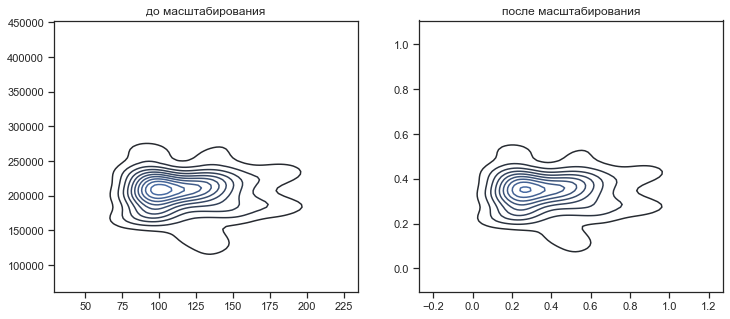

In [19]:
draw_kde(['tempo', 'duration_ms'], data, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

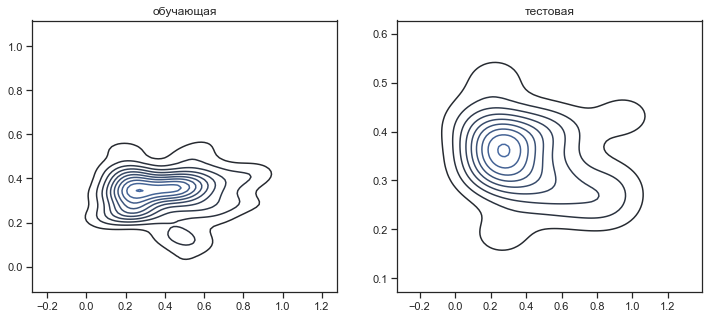

In [20]:
draw_kde(['tempo', 'duration_ms'], data_cs32_scaled_train, data_cs32_scaled_test, 'обучающая', 'тестовая')

# Обработка выбросов для числовых признаков

In [21]:
data2 = pd.read_csv('/Users/a.fedorova/Desktop/учеба/Великолепная мага/2 сем/датасеты/AB_NYC_2019.csv')

In [22]:
data2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [23]:
data2.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [35]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

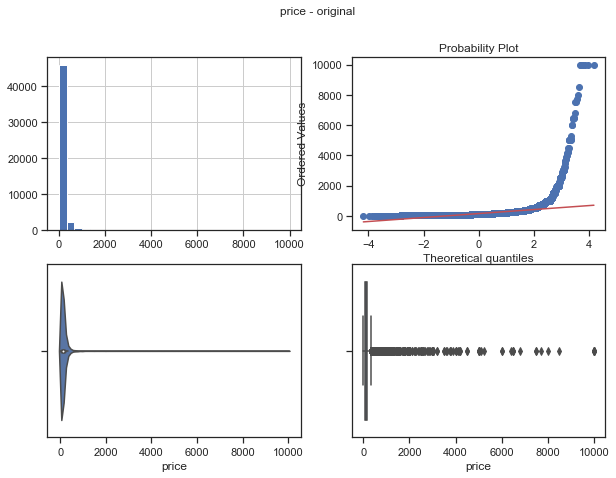

In [39]:
diagnostic_plots(data2, 'price', 'price - original')

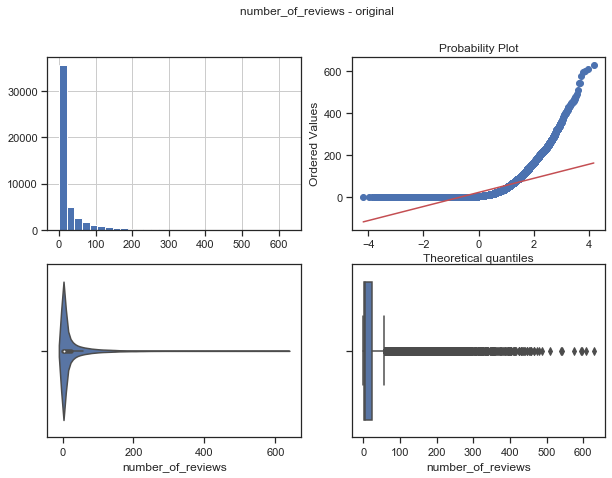

In [40]:
diagnostic_plots(data2, 'number_of_reviews', 'number_of_reviews - original')

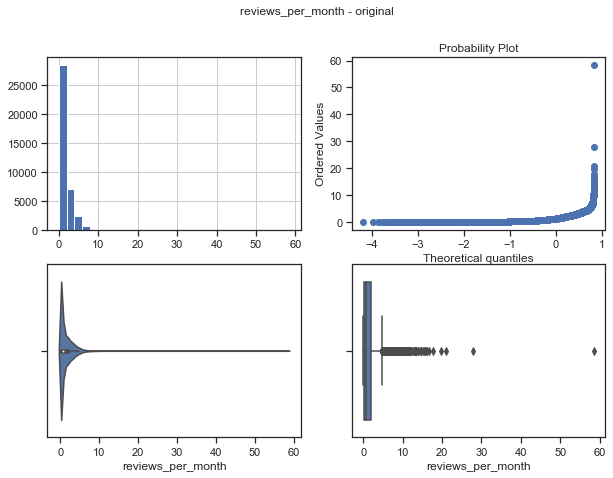

In [41]:
diagnostic_plots(data2, 'reviews_per_month', 'reviews_per_month - original')

Явно заметны выбросы на полях: number_of_reviews, reviews_per_month, price

In [24]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [26]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col):
    lower_boundary = df[col].quantile(0.05)
    upper_boundary = df[col].quantile(0.95)
    return lower_boundary, upper_boundary

### Удаление выбросов (number_of_reviews)

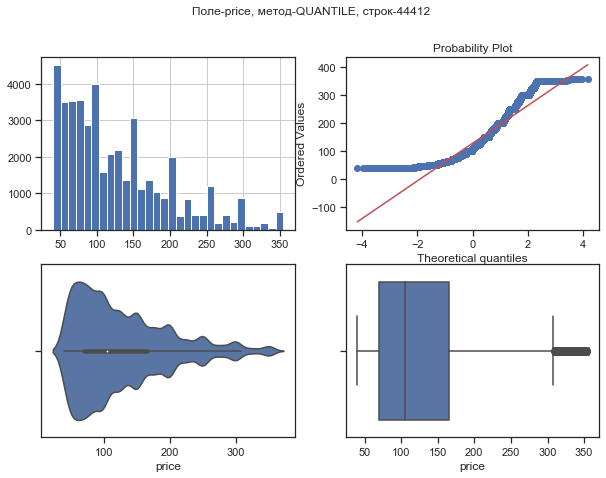

In [38]:
# Вычисление верхней и нижней границы
lower_boundary, upper_boundary = get_outlier_boundaries(data2, "price")
# Флаги для удаления выбросов
outliers_temp = np.where(data2["price"] > upper_boundary, True, 
                         np.where(data2["price"] < lower_boundary, True, False))
# Удаление данных на основе флага
data_trimmed = data2.loc[~(outliers_temp), ]  
title = 'Поле-{}, метод-{}, строк-{}'.format("price", "QUANTILE", data_trimmed.shape[0])
diagnostic_plots(data_trimmed, "price", title)

### Замена выбросов

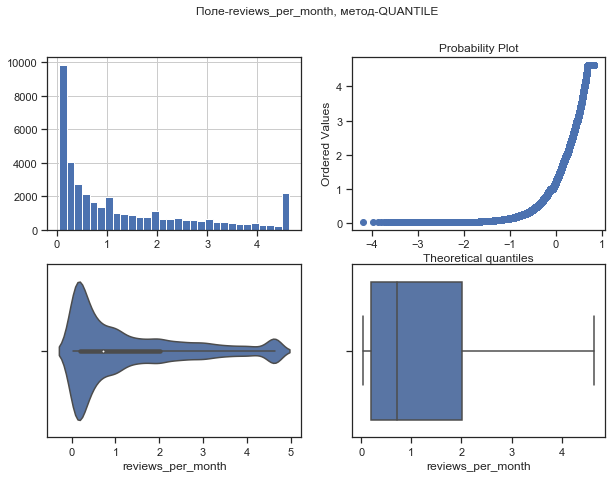

In [43]:
# Вычисление верхней и нижней границы
lower_boundary, upper_boundary = get_outlier_boundaries(data2, "reviews_per_month")
# Изменение данных
data2["reviews_per_month"] = np.where(data2["reviews_per_month"] > upper_boundary, upper_boundary,
                     np.where(data2["reviews_per_month"] < lower_boundary, lower_boundary, data2["reviews_per_month"]))
title = 'Поле-{}, метод-{}'.format("reviews_per_month", "QUANTILE")
diagnostic_plots(data2, "reviews_per_month", title)

# Обработка нестандартного признака

In [45]:
data2.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [52]:
# Сконвертируем дату и время в нужный формат
data2["last_review_date"] = data2.apply(lambda x: pd.to_datetime(x["last_review"], format='%Y/%m/%d'), axis=1)

In [53]:
data2.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_date
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018-10-19
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019-05-21
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,NaT
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019-07-05
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018-11-19


In [54]:
data2.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                               object
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
last_review_date                  datetime64[ns]
dtype: object

In [55]:
# День
data2['last_review_day'] = data2['last_review_date'].dt.day
# Месяц
data2['last_review_month'] = data2['last_review_date'].dt.month
# Год
data2['last_review_year'] = data2['last_review_date'].dt.year

In [56]:
data2.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_date,last_review_day,last_review_month,last_review_year
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018-10-19,19.0,10.0,2018.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019-05-21,21.0,5.0,2019.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,NaT,NaN,NaN,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019-07-05,5.0,7.0,2019.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018-11-19,19.0,11.0,2018.0
